# K-Means

In [167]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib as plt
from IPython import display


In [2]:
df = pd.read_table("data/unbalance.txt", delim_whitespace=True, names=('x', 'y'))

In [3]:
df.head()

,x,y
0,151700,351102
1,155799,354358
2,142857,352716
3,152726,349144
4,151008,349692


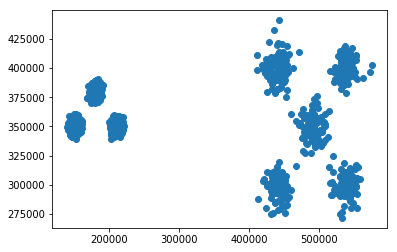

In [4]:
pl.scatter(df['x'], df['y'])

Let's splice some colour!

In [5]:
colors = np.random.randint(low=0, high=2, size=len(df))

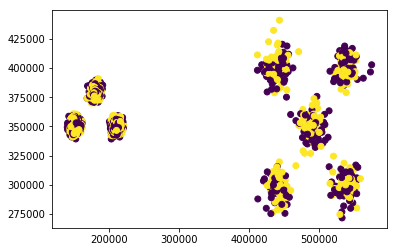

In [6]:
pl.scatter(df['x'], df['y'], c=colors)

Pretty!

## Algorithm

- Assign all points with random labels
- Choose N points at random and set them as centroids

    - Repeat while clusters change
    - Classify each point to as the centroid that's closest to it
        - Calculate distance to each centroid
        - Choose the cluster with the smallest distance as the new label
    - Assign new centroids as the centers of all the clusters
        - sum(x)/len(x), sum(y)/len(y)

In [7]:
#Number of clusters
k = 8

Better to work with the same random numbers.

In [138]:
np.random.seed(42)

Assign random labels for each point>

In [139]:
labels = np.random.randint(low=0, high=k, size=len(df))
labels

array([6, 3, 4, ..., 0, 1, 4])

Choose k random poits as centroids.

In [140]:
def RandomCentroids(k, df):
    centroidIndexes = np.random.randint(len(df), size=k)

    centroids = []

    for i in range(k):
        centroids.append({'x': df.iloc[centroidIndexes[i]]['x'], 'y': df.iloc[centroidIndexes[i]]['y']})

    return centroids

In [141]:
centroids = RandomCentroids(k, df)
centroids

[{'x': 212128, 'y': 350775},
 {'x': 148555, 'y': 347964},
 {'x': 150427, 'y': 348606},
 {'x': 181333, 'y': 382593},
 {'x': 204282, 'y': 348211},
 {'x': 208812, 'y': 350206},
 {'x': 211753, 'y': 347188},
 {'x': 180561, 'y': 378436}]

### Classify each point as the centroid closest to it.

Euclidian distance between two points.

In [13]:
np.linalg.norm([df.iloc[0]['x'], df.iloc[0]['y']] - [centroids[0]['x'], centroids[0]['y']])

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [14]:
[df.iloc[0]['x'], df.iloc[0]['y']] 

[151700, 351102]

In [15]:
[centroids[0]['x'], centroids[0]['y']]

[212128, 350775]

In [16]:
from scipy.spatial import distance as scipyDistance
distance = scipyDistance.euclidean([df.iloc[0]['x'], df.iloc[0]['y']], [centroids[0]['x'], centroids[0]['y']])
distance

60428.884757208616

In [146]:
def Categorize(k, df, centroids):
    
    labels = []
    
    #For each point in the dataframe
    for pointIndex in range(len(df)):
        point = df.iloc[pointIndex]

        #Compute distance to each of the centroids
        distances = {}

        for cluster in range(k):
            distance = scipyDistance.euclidean([point['x'], point['y']], [centroids[cluster]['x'], centroids[cluster]['y']])
            distances[cluster] = distance

        #Choose the closest cluster as it's label
        closestCluster = min(distances, key=distances.get)
        labels.append(closestCluster)
        
    return labels

In [147]:
labels = Categorize(k, df, centroids)

Let's see the pretty picture after one iteration.

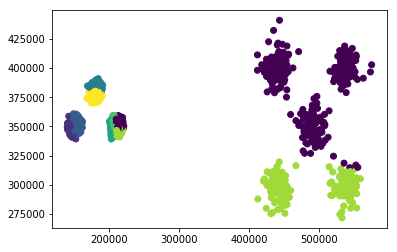

In [91]:
pl.scatter(df['x'], df['y'], c=labels)

In [92]:
centroidsXs = []
centroidsYs = []
for i in range(k):
    centroidsXs.append(centroids[i]['x'])
    centroidsYs.append(centroids[i]['y'])

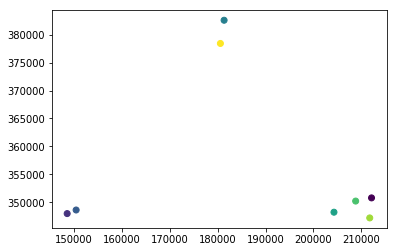

In [93]:
pl.scatter(centroidsXs, centroidsYs, c=[0,1,2,3,4,5,6,7])

Really wanna scale the two plots... Just a small hack will do it.

In [94]:
centroidsXs.append(min(df['x']))
centroidsXs.append(max(df['x']))
centroidsYs.append(min(df['y']))
centroidsYs.append(max(df['y']))

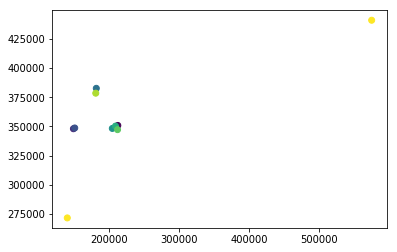

In [95]:
pl.scatter(centroidsXs, centroidsYs, c=[0,1,2,3,4,5,6,7,8,8])

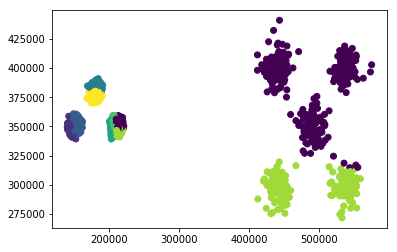

In [96]:
pl.scatter(df['x'], df['y'], c=labels)

All the centroids are in the 3 clusters to the left.

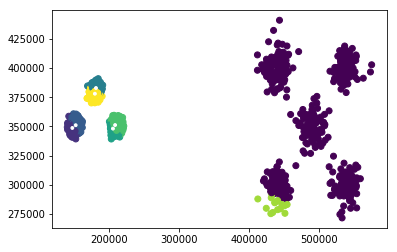

In [57]:
pl.scatter(df['x'], df['y'], c=labels)

centroidsXs = []
centroidsYs = []
for i in range(k):
    centroidsXs.append(centroids[i]['x'])
    centroidsYs.append(centroids[i]['y'])
    
pl.scatter(centroidsXs, centroidsYs, marker='o', s=8, c=['white','white','white','white','white','white','white','white'])


If you squint your eyes just right, you may be able to see the little white dots representing the centroids.

### Compute centroids
Alright. Let's compute the centroids now. We shall do it on one fell swoop!

In [41]:
def ComputeCentroids(k, df, labels):

    #Sum all x and y corrdinates for each cluster
    clustersXSum = {}
    clustersYSum = {}
    clusterCount = {}

    for cluster in range(k):
        clustersXSum[cluster] = 0
        clustersYSum[cluster] = 0
        clusterCount[cluster] = 0

    for i in range(len(df)):
        label = labels[i]

        clustersXSum[label] += df.iloc[i]['x']
        clustersYSum[label] += df.iloc[i]['y']
        clusterCount[label] += 1

    #Compute the centroids by dividing the sum of all X and Y points by the count of the points.
    centroids = {}
    
    for cluster in range(k):
        centroids[cluster] = {}
        centroids[cluster]['x'] = clustersXSum[cluster] / clusterCount[cluster]
        centroids[cluster]['y'] = clustersYSum[cluster] / clusterCount[cluster]
        
    return centroids

In [42]:
centroids = ComputeCentroids(k, df, labels)

Let's see where we placed the new centroids.

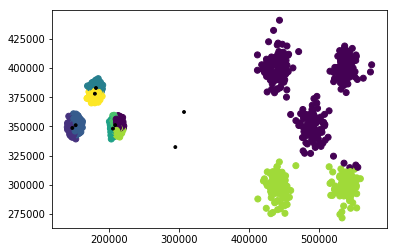

In [44]:
pl.scatter(df['x'], df['y'], c=labels)

centroidsXs = []
centroidsYs = []
for i in range(k):
    centroidsXs.append(centroids[i]['x'])
    centroidsYs.append(centroids[i]['y'])
    
pl.scatter(centroidsXs, centroidsYs, marker='o', s=8, c=['black','black','black','black','black','black','black','black'])


Alright. New clusters seem about right.

Let's automate it and do it a couple of times.

In [180]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib as plt
from IPython import display

class KMeans():
    
    def Run(self, df, k, maxLoops, isLivePlotting):
                
        #Initial centroids
        centroids = self.RandomCentroids(k, df)
                
        for loop in range(maxLoops):
                
            #Categorize points 
            labels = self.Categorize(k, df, centroids)

            #Plot each iteration
            if(isLivePlotting):
                self.Plot(df, labels)
                
            #Compare changes and break if converged

            
            #Compute centroids
            centroids = self.ComputeCentroids(k, df, labels)

    
    ###
    def Plot(self, df, labels):
        pl.scatter(df['x'], df['y'], c=labels)
        display.clear_output(wait=True)
        display.display(pl.gcf())
    
    ###
    def RandomCentroids(self, k, df):
        centroidIndexes = np.random.randint(len(df), size=k)

        centroids = []

        for i in range(k):
            centroids.append({'x': df.iloc[centroidIndexes[i]]['x'], 'y': df.iloc[centroidIndexes[i]]['y']})

        return centroids

    ###
    def Categorize(self, k, df, centroids):
    
        labels = []

        #For each point in the dataframe
        for pointIndex in range(len(df)):
            point = df.iloc[pointIndex]

            #Compute distance to each of the centroids
            distances = {}

            for cluster in range(k):
                distance = scipyDistance.euclidean([point['x'], point['y']], [centroids[cluster]['x'], centroids[cluster]['y']])
                distances[cluster] = distance

            #Choose the closest cluster as it's label
            closestCluster = min(distances, key=distances.get)
            labels.append(closestCluster)

        return labels

    ###
    def ComputeCentroids(self, k, df, labels):

        #Sum all x and y corrdinates for each cluster
        clustersXSum = {}
        clustersYSum = {}
        clusterCount = {}

        for cluster in range(k):
            clustersXSum[cluster] = 0
            clustersYSum[cluster] = 0
            clusterCount[cluster] = 0

        for i in range(len(df)):
            label = labels[i]

            clustersXSum[label] += df.iloc[i]['x']
            clustersYSum[label] += df.iloc[i]['y']
            clusterCount[label] += 1

        #Compute the centroids by dividing the sum of all X and Y points by the count of the points.
        centroids = {}

        for cluster in range(k):
            centroids[cluster] = {}
            centroids[cluster]['x'] = clustersXSum[cluster] / clusterCount[cluster]
            centroids[cluster]['y'] = clustersYSum[cluster] / clusterCount[cluster]

        return centroids

In [181]:
kMeans = KMeans()

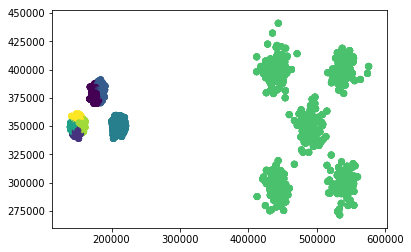

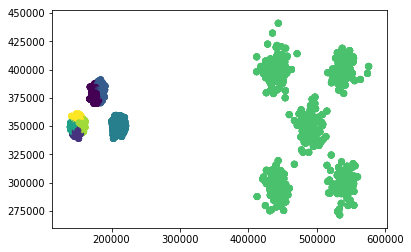

In [190]:
kMeans.Run(df, 8, 5, True)

Not the greatest. We gotta try it with more normalized data.

In [195]:
kaggleDf = df = pd.read_csv("data/xclara.csv",header=0, names=('x', 'y'))

In [197]:
kaggleDf.head()

,x,y
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


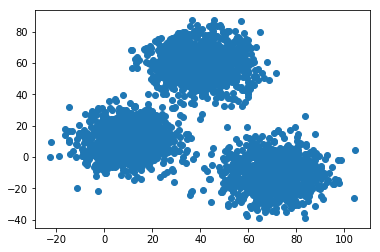

In [198]:
pl.scatter(kaggleDf['x'], kaggleDf['y'])

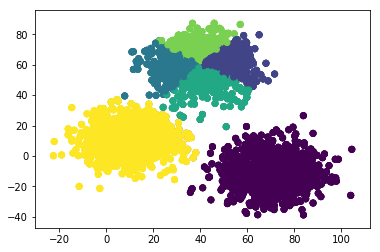

In [ ]:
kMeans.Run(kaggleDf, 6, 5, True)